This is iris flower classification using Logistic Regression and Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np


# Prepare_Data

> Import 

In [2]:
path_sql = "/kaggle/input/iris/database.sqlite"

In [3]:
conn = sqlite3.connect(path_sql)

In [4]:
query = """ SELECT * FROM Iris"""

In [5]:
df = pd.read_sql(  query , conn ).set_index("Id")

> Explore

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

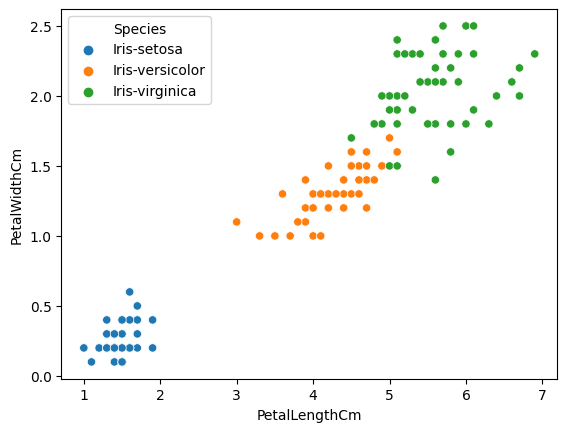

In [8]:
sns.scatterplot( x="PetalLengthCm" , y="PetalWidthCm" , hue="Species" ,data=df)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

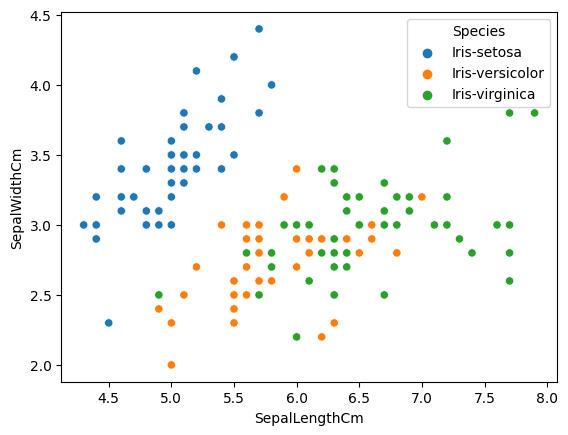

In [9]:
sns.scatterplot( x="SepalLengthCm" , y="SepalWidthCm" , hue="Species" ,data=df)

Text(0, 0.5, 'Frequency')

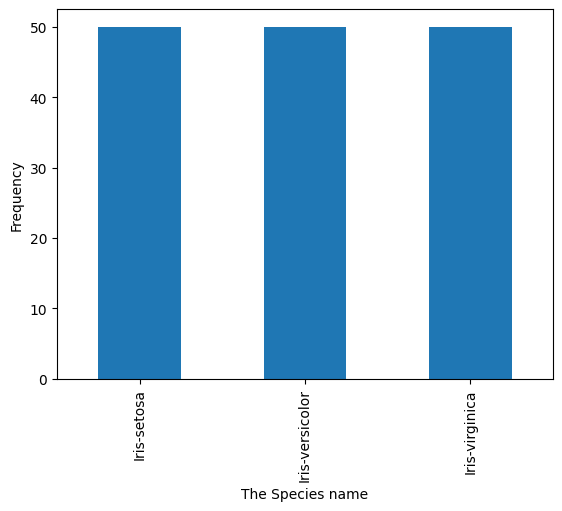

In [10]:
df["Species"].value_counts().plot(kind = "bar")
plt.xlabel("The Species name")
plt.ylabel("Frequency")

> Split

In [11]:
target = "Species"
X = df.drop(columns = target)
y = df[target]

In [12]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.1 , random_state =42)

# Build Model

> Baseline

In [13]:
baseline_acc = y_train.value_counts(normalize = True).max()
baseline_acc

0.34814814814814815

> # Logistic_Regression

In [14]:
model_lr = LogisticRegression(max_iter=1000)


In [15]:
model_lr.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [16]:
print(f"Traning Accuracy {model_lr.score(X_train , y_train)}")


Traning Accuracy 0.9777777777777777


In [17]:
print(f"Vlidation Accuracy {model_lr.score(X_test , y_test)}")

Vlidation Accuracy 1.0


In [18]:
features_lr = X_train.columns
importance_lr = model_lr.coef_[0]

feature_im_ir = pd.Series( np.exp(importance_lr) , index=features_lr).sort_values(ascending=True)

Text(0.5, 1.0, 'Feature Importance in Model Decision')

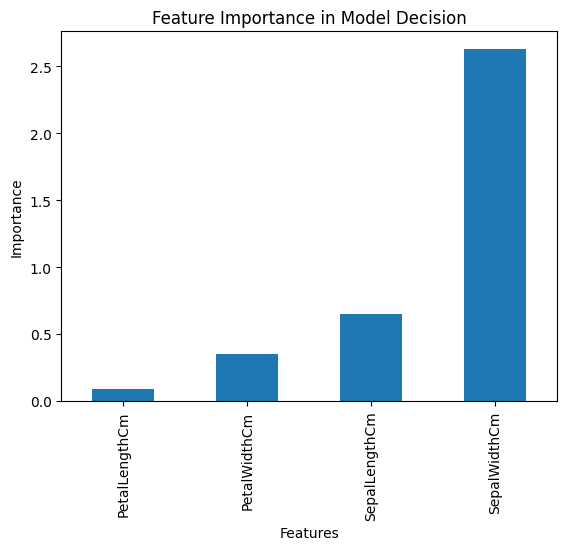

In [19]:
feature_im_ir.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Model Decision")

>   # Decision Tree

In [20]:
model_d = DecisionTreeClassifier(random_state = 42)
model_d.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
print(f"Traning Accuracy {model_d.score(X_train , y_train)}")

Traning Accuracy 1.0


In [22]:
print(f"Validation Accuracy {model_d.score(X_test , y_test)}")

Validation Accuracy 1.0


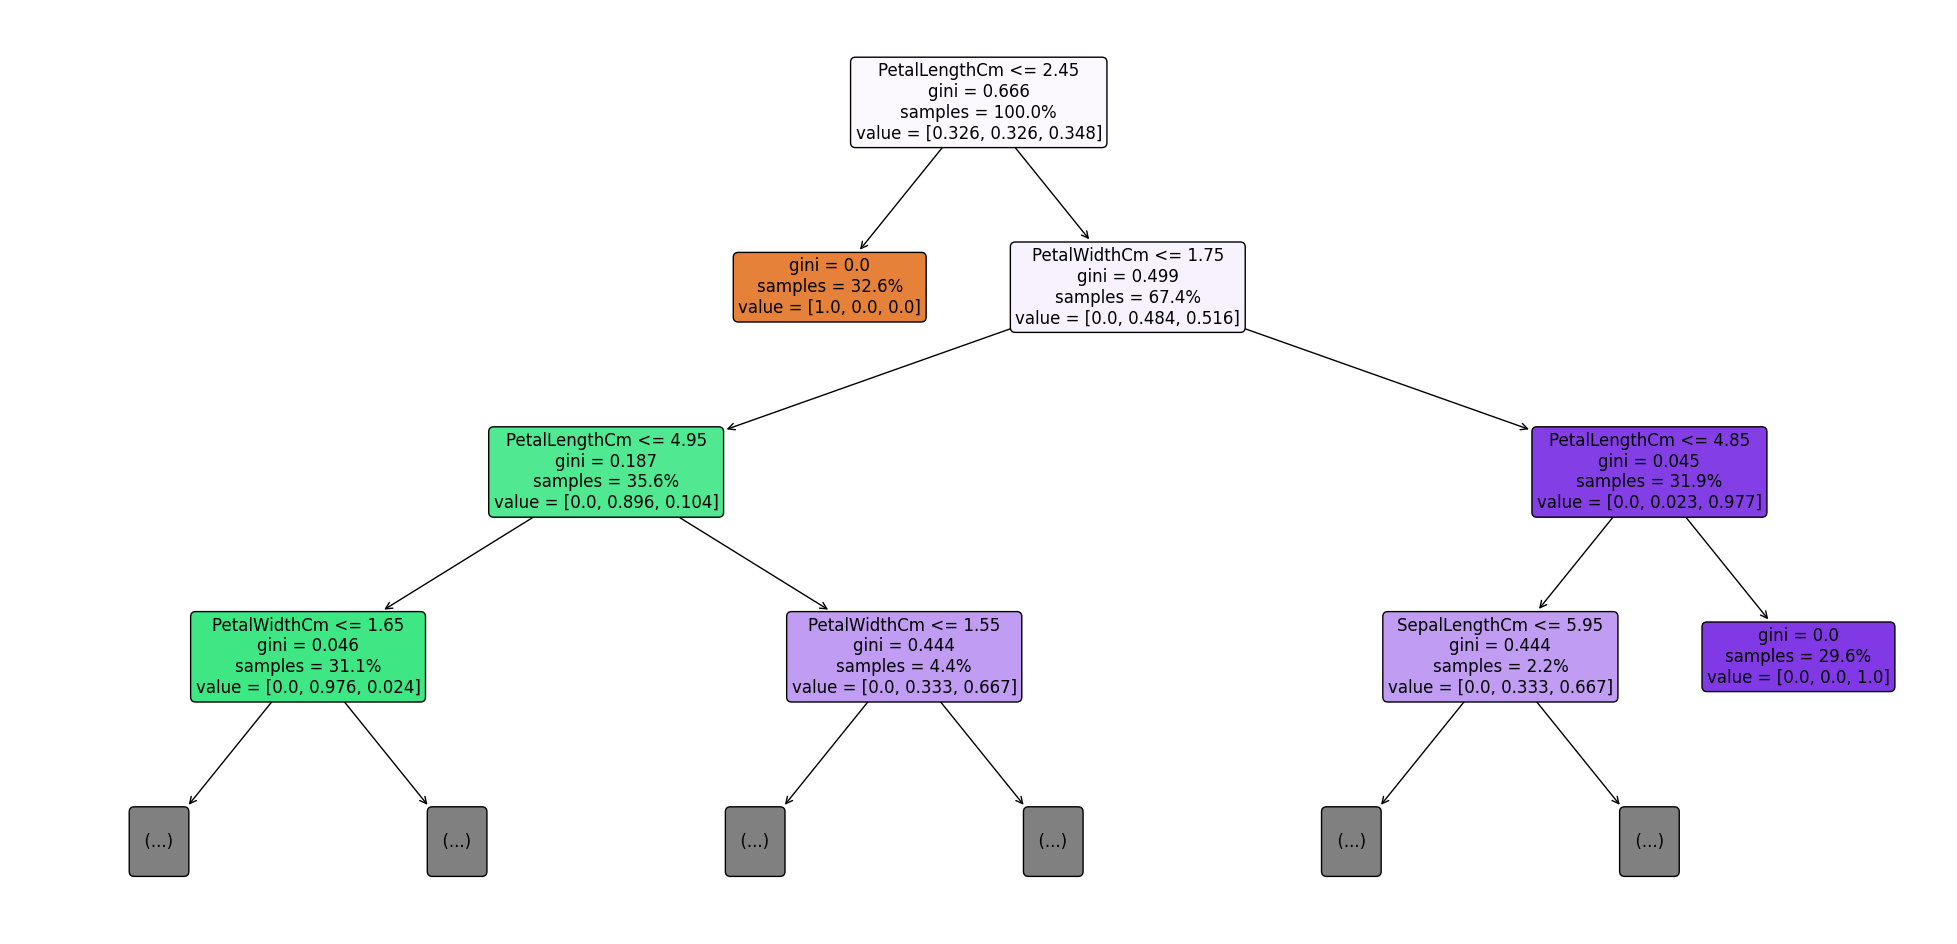

In [23]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model_d ,
    feature_names= X_train.columns.to_list() ,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [24]:
feature = X_train.columns
importance = model_d.feature_importances_
feature_imp = pd.Series( importance , index=feature).sort_values(ascending=True)

Text(0.5, 1.0, 'Feature Importance in Model Decision')

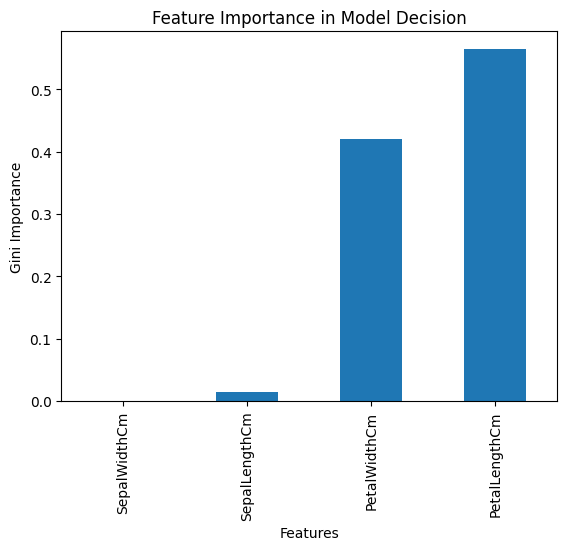

In [25]:
feature_imp.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Gini Importance")
plt.title("Feature Importance in Model Decision")